<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">Introduction</div>

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">Table of content</div>

1) **Choice of Metrics**  
2) **Library import & Dataset**  
3.1) **Feature generation**  
3.2) **Data cleaning**              
3.3) **Data scaling (Normalization | Standartization)**  
4) **Dimensionality reduction**  
5) **Clustering**  
6) **Business Recommendations**  

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">1) Choice of Metrics  </div>

There are various metrics for clustering, for example:
* Silhouette coefficient  (https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)
* Calinski-Harabasz Index (https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)
* Davies-Bouldin Index (https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index)

In this work, in order to evaluate the quality of clustering, we will use the Silhouette coefficient metric as well as after dimensionality reduction, we will look at the data in three-dimensional space for a visual assessment of the quality of clustering. 

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">2) Library import & Dataset </div>

In [231]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os

In [232]:
df = pd.read_csv('bank_transactions_data_2.csv', sep=',')

In [233]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [235]:
print(f'Dataset size: {df.shape}')

Dataset size: (2512, 16)


In [236]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">3.1) Feature generation  </div>

In [237]:
df['time_so_far'] = datetime.now().year - df['TransactionDate'].dt.year # Client Age

In [238]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'time_so_far'],
      dtype='object')

# Let's look at EDA:
______________________________________________________________________________________________________________

## First, let's look at the correlation matrix:

## Next, look at the distributions of quantitative variables:

/home/lucasvillefort/anaconda3/envs/conda1/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/lucasvillefort/anaconda3/envs/conda1/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/lucasvillefort/anaconda3/envs/conda1/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/lucasvillefort/anaconda3/envs/conda1/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/lucasvillefort/anaconda3/envs/conda1/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

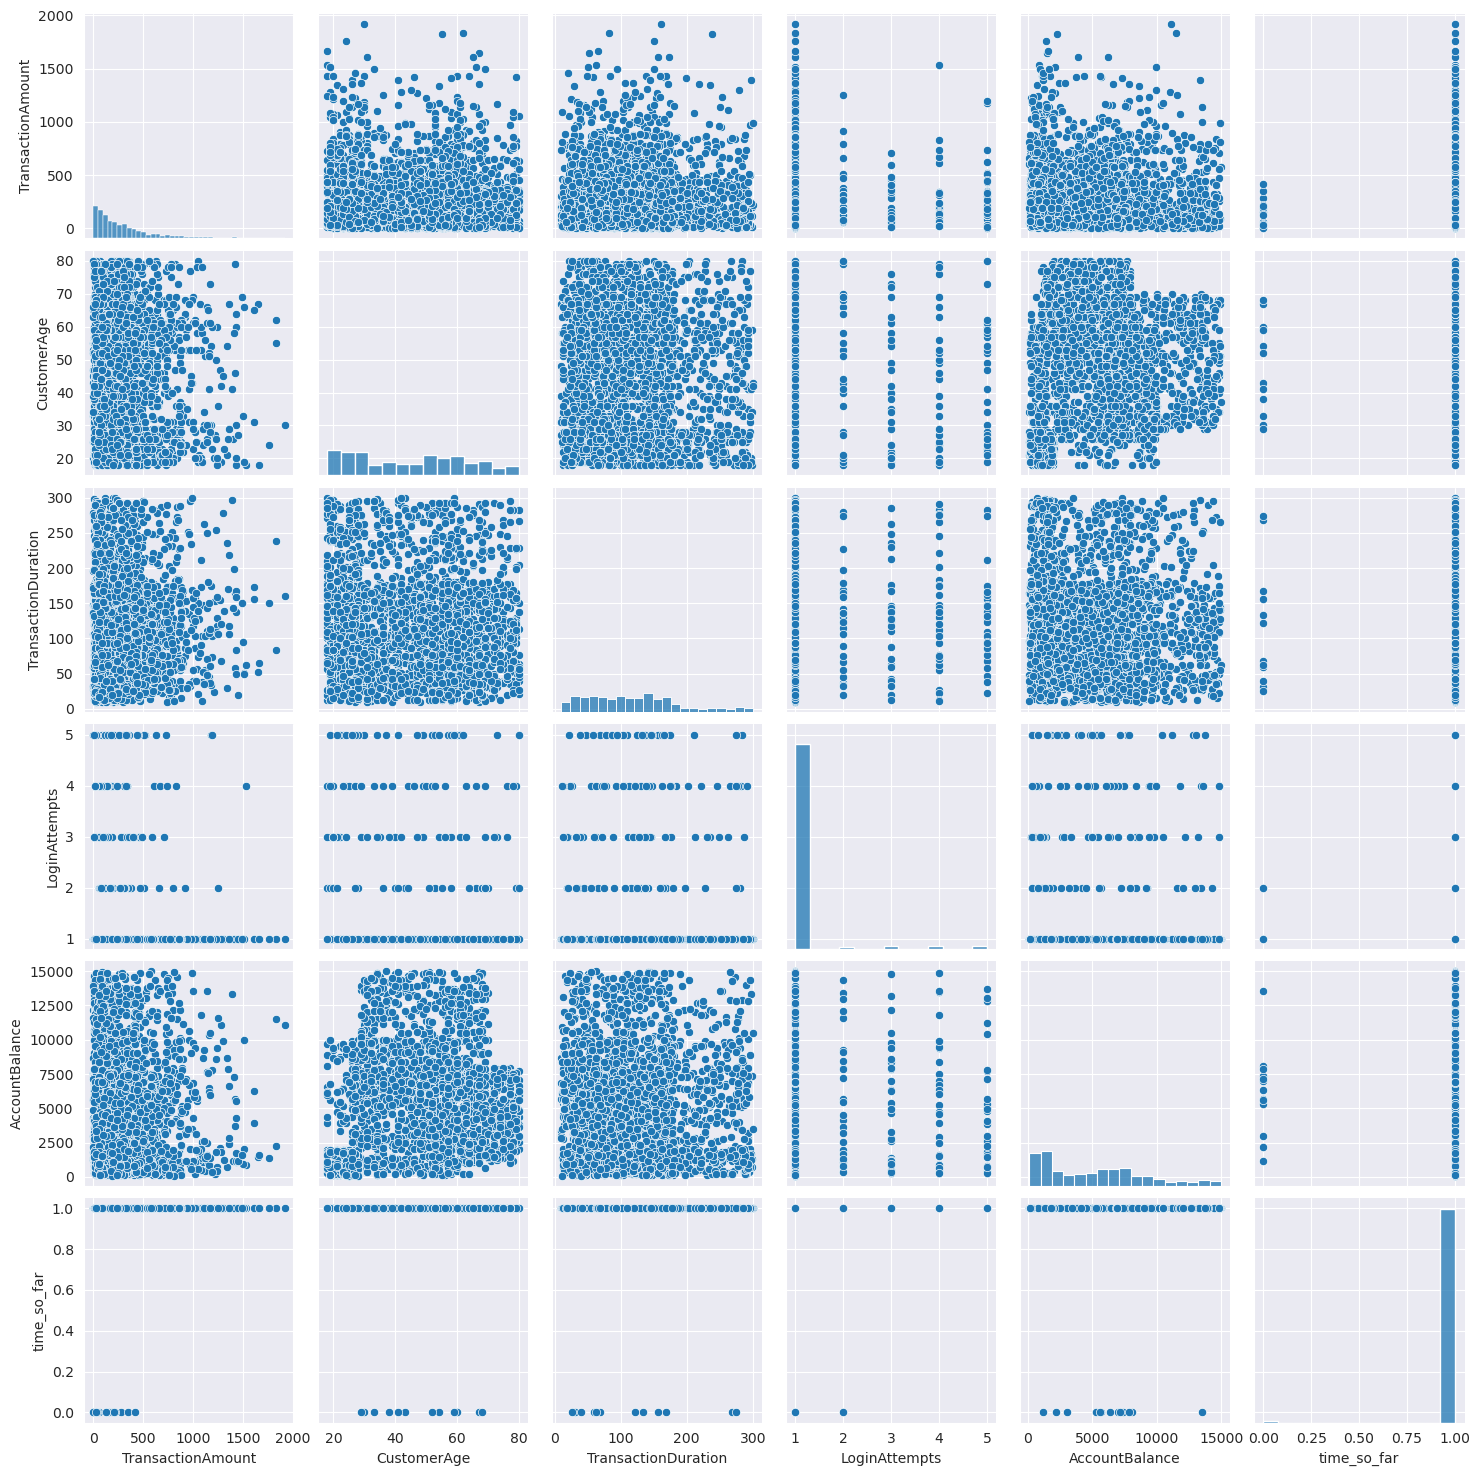

In [239]:
to_plot = ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'time_so_far']
sns.pairplot(df[to_plot], palette='Set1')
plt.show()

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">3.2) Data cleaning </div>

## Remove gaps in the data:

In [240]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
time_so_far                0
dtype: int64

In [241]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
time_so_far                0
dtype: int64

In [242]:
df.dropna(inplace=True)  # Removed objects with gaps in income

In [243]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,time_so_far
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">3.3) Data scaling (Normalization | Standartization)  </div>

Data scaling is necessary to bring all features to the same scale. If this is not done, then the attention of the algorithm will be attracted to features that include large values (this is bad)  
In this work, normalization will be used as data scaling (as a result of normalization, all features are in the range from 0 to 1)

In [244]:
df.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate            object
time_so_far                         int32
dtype: object

In [245]:

columnss = df.select_dtypes(include=["int32", "float64", "int64"]).columns
scaler = MinMaxScaler()
df[columnss] = scaler.fit_transform(df[columnss])
        

In [246]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [247]:
from sklearn.preprocessing import LabelEncoder
col_object = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in col_object:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [248]:
df.dtypes

TransactionID                       int64
AccountID                           int64
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                     int64
Location                            int64
DeviceID                            int64
IP Address                          int64
MerchantID                          int64
Channel                             int64
CustomerAge                       float64
CustomerOccupation                  int64
TransactionDuration               float64
LoginAttempts                     float64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
time_so_far                       float64
dtype: object

In [249]:
df_col_select = df.select_dtypes(exclude=["datetime64[ns]"]).columns

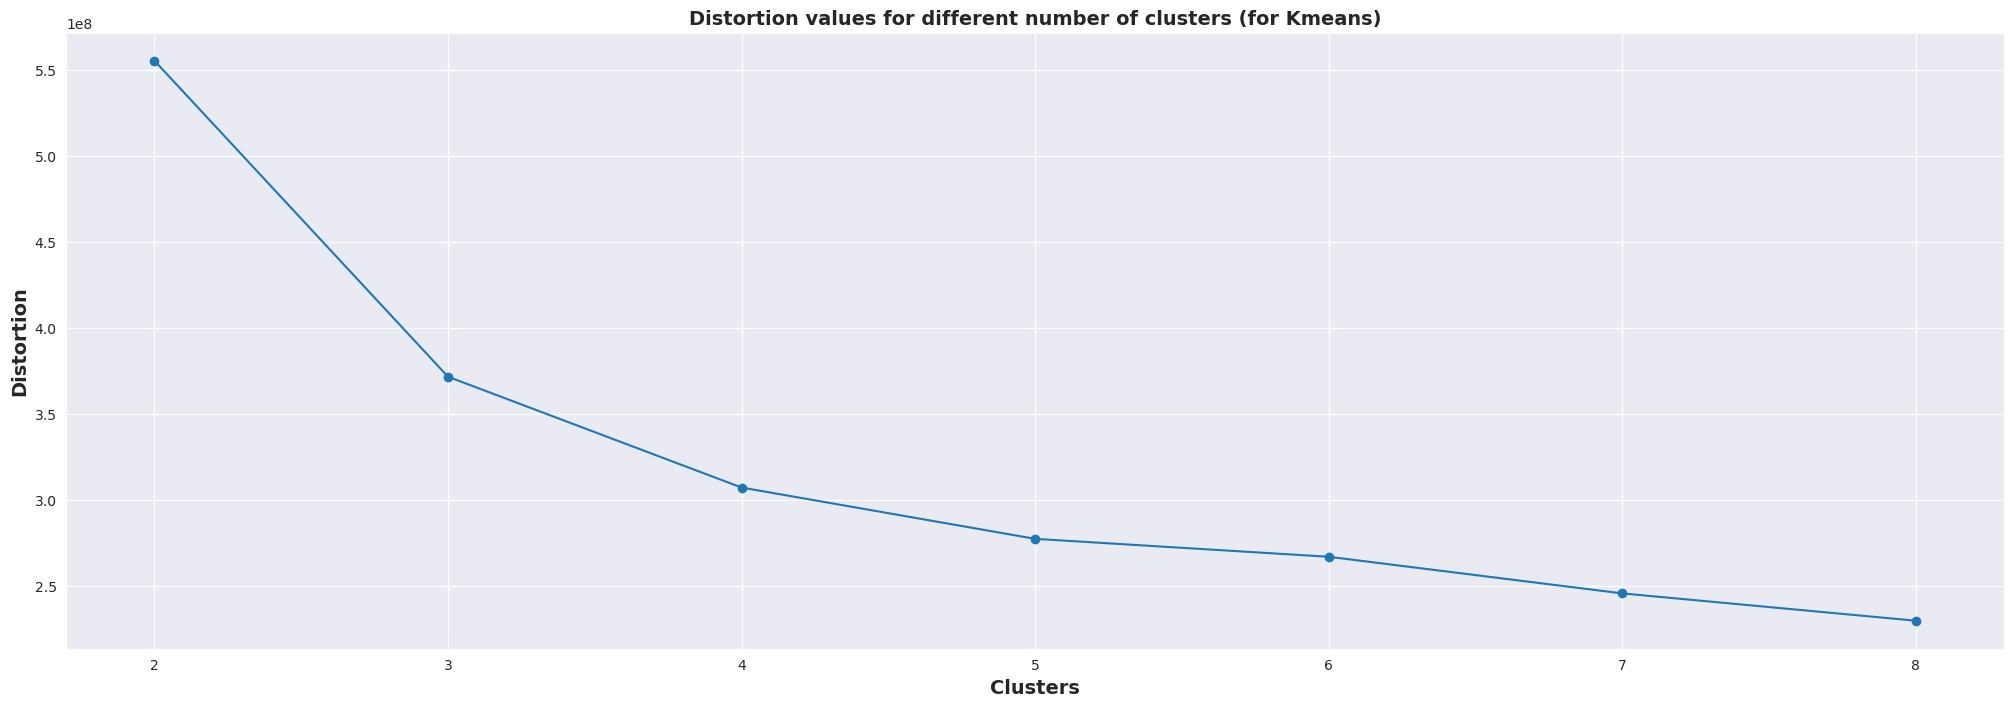

In [250]:
km = KMeans()
inertia = []
for n_clusters in range(2, 9):
    km.set_params(n_clusters=n_clusters)
    km.fit(df[df_col_select])
    inertia.append(km.inertia_)
    
plt.figure(figsize=(25, 8))
sns.set_style("darkgrid")
plt.title('Distortion values for different number of clusters (for Kmeans)', fontsize=14, fontweight='bold')
plt.xlabel('Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Distortion', fontsize=14, fontweight='bold')
plt.plot(range(2, 9), inertia, marker='o')
plt.show()

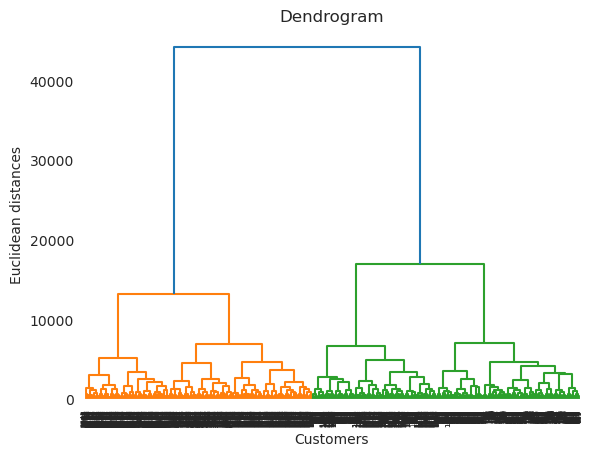

In [251]:
# Dendrogram

import scipy.cluster.hierarchy as shc

dendrogram = shc.dendrogram(shc.linkage(df[df_col_select], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">4) Dimensionality reduction  </div>

The dimensionality reduction problem is used in the following situations:
* There are a lot of features in the dataset, and we want to reduce their number, leaving as much information as possible
* We have many features in the dataset, and we want to visualize the data (for example, in 3D space)
* Solving the problem of multicollinearity

There are many different options for dimensionality reduction, which are based on different methods, for example:
* Principal component analysis (PCA)
* Uniform Manifold Approximation and Projection (UMAP)
* t-distributed Stochastic Neighbor Embedding (t-SNE)
* Locally-Linear Embedding (LLE)
* Multidimensional Scaling (MDS)

The most commonly used dimensionality reduction algorithm is PCA, and we also use it in this work.  
Essentially, in PCA we make a transition from one variable space to another, with the new space containing fewer variables (n_component), where the new variables are uncorrelated and are the weighted sum of the old variables.  
As a result we get m variables: {PC1, PC2, PC3... PCm} , where PC1 will receive the most information(maximum sample variance), PC2 - less, and so on (A variable is considered informative if it has a high sample variance).  
8 components will be used in this work.

In [252]:

pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(df[df_col_select])
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))
data = pd.DataFrame(pca_features, columns =([f'PC{i}' for i in range(1, 2 + 1)]))


df_transform = data # df: scaling + dimensionality reduction
df_transform.index = df.index  # for convenient work with dataframes

0.9184101913308378


In [253]:
df_transform

,PC1,PC2
0,-1254.164910,42.326234
1,-1256.757231,-270.519773
2,-1252.084361,-102.420246
3,-1251.592218,-147.197340
4,-1253.267113,-52.153192
...,...,...
2507,1252.012455,258.740549
2508,1251.755909,40.038945
2509,1253.494338,-258.725771
2510,1256.476633,270.972149


<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">5) Clustering</div>

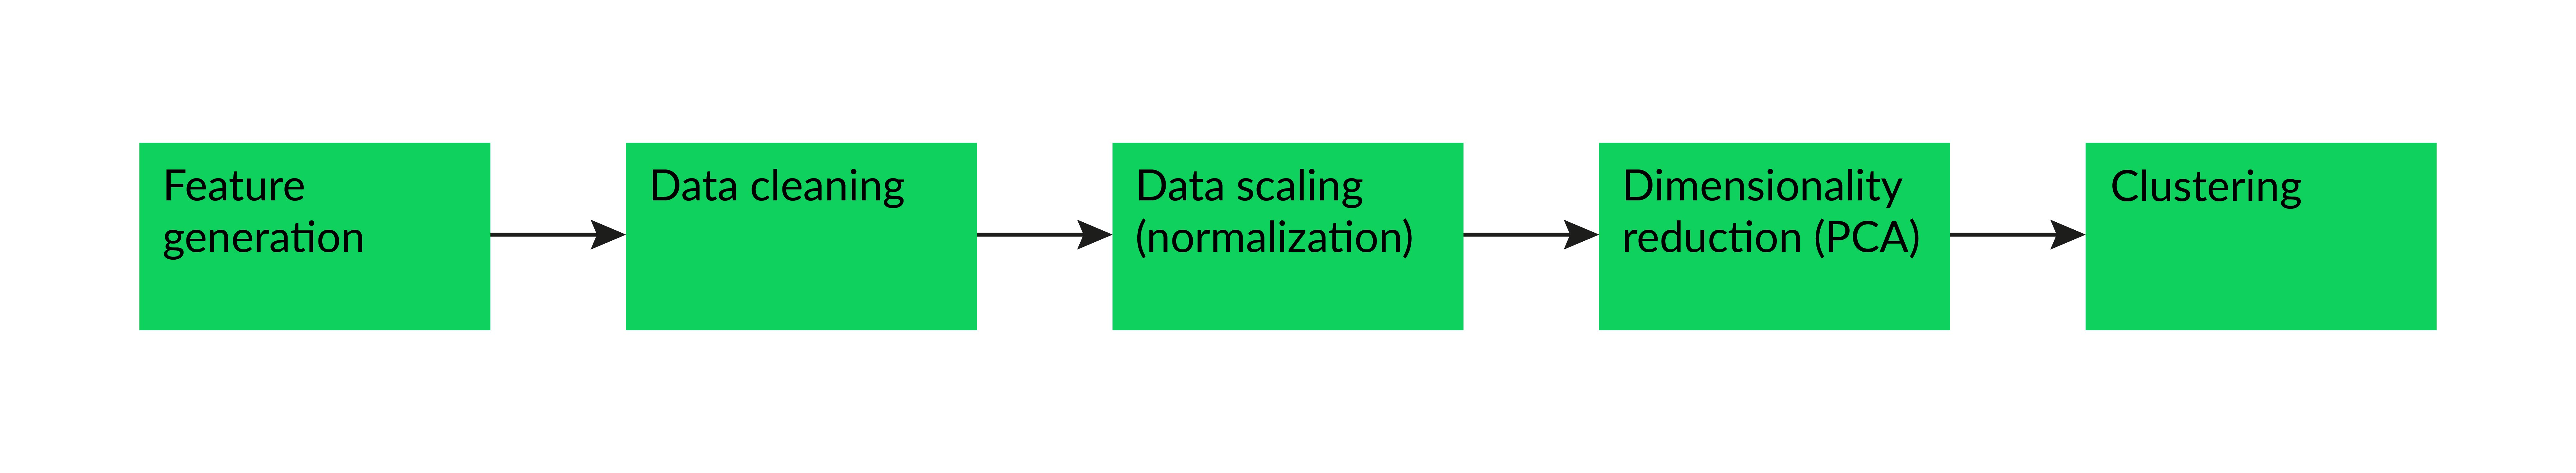

So, we have finished data preprocessing  
In total, we have three dataframes:
* df (with feature generation and data cleaning)  
* df_scaled (scaled version of df)
* df_transform (dimensionality reduction for df_scaled)

## Important:
We will apply clustering algorithms for df_transform, based on this we will get labels for all objects, then we will combine the label column for objects with df in order to get information about clusters (on graphs).

In this work, the following clustering algorithms will be used: (https://scikit-learn.org/stable/modules/clustering.html)
* K-means ++ 
* Aglomerative clustering
* Spectral clustering


It is noteworthy that in these algorithms it is necessary to pre-specify the number of clusters.     
We assume that the minimum number of clusters is two, the maximum number of clusters is eight. Based on this, for different cases of the number of clusters, we will build models.    
If the metric is maximum for models with a large number of clusters, then we will iteratively increase the maximum number of clusters and build new models.


# What can we say from these graphs:  
* Good metric results for Agglomerative and Spectral Clustering algorithms  
* Best Model: AgglomerativeClustering(n_clusters=3).

# Now let's build graphs of the main characteristics for features int | float for the best models (since we got object labels)

In [254]:
best_model = AgglomerativeClustering(n_clusters=2)
labels = pd.DataFrame(best_model.fit_predict(df_transform), columns=['Clusters'], index=df.index)
df = pd.concat([df, labels], axis=1)

In [255]:
best_model = AgglomerativeClustering(n_clusters=2)
labels = pd.DataFrame(best_model.fit_predict(df_transform), columns=['Clusters_PCA'], index=df.index)
df_transform = pd.concat([df_transform, labels], axis=1)



In [256]:

num_cols = ['TransactionID', 'AccountID', 'TransactionAmount','TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance',"Clusters"]

In [257]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'time_so_far', 'Clusters'],
      dtype='object')

/tmp/ipykernel_13064/2678065035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.boxplot(
/tmp/ipykernel_13064/2678065035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.boxplot(
/tmp/ipykernel_13064/2678065035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.boxplot(
/tmp/ipykernel_13064/2678065035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.boxplot(
/tmp/ipykernel_13064/2678065035.py:1

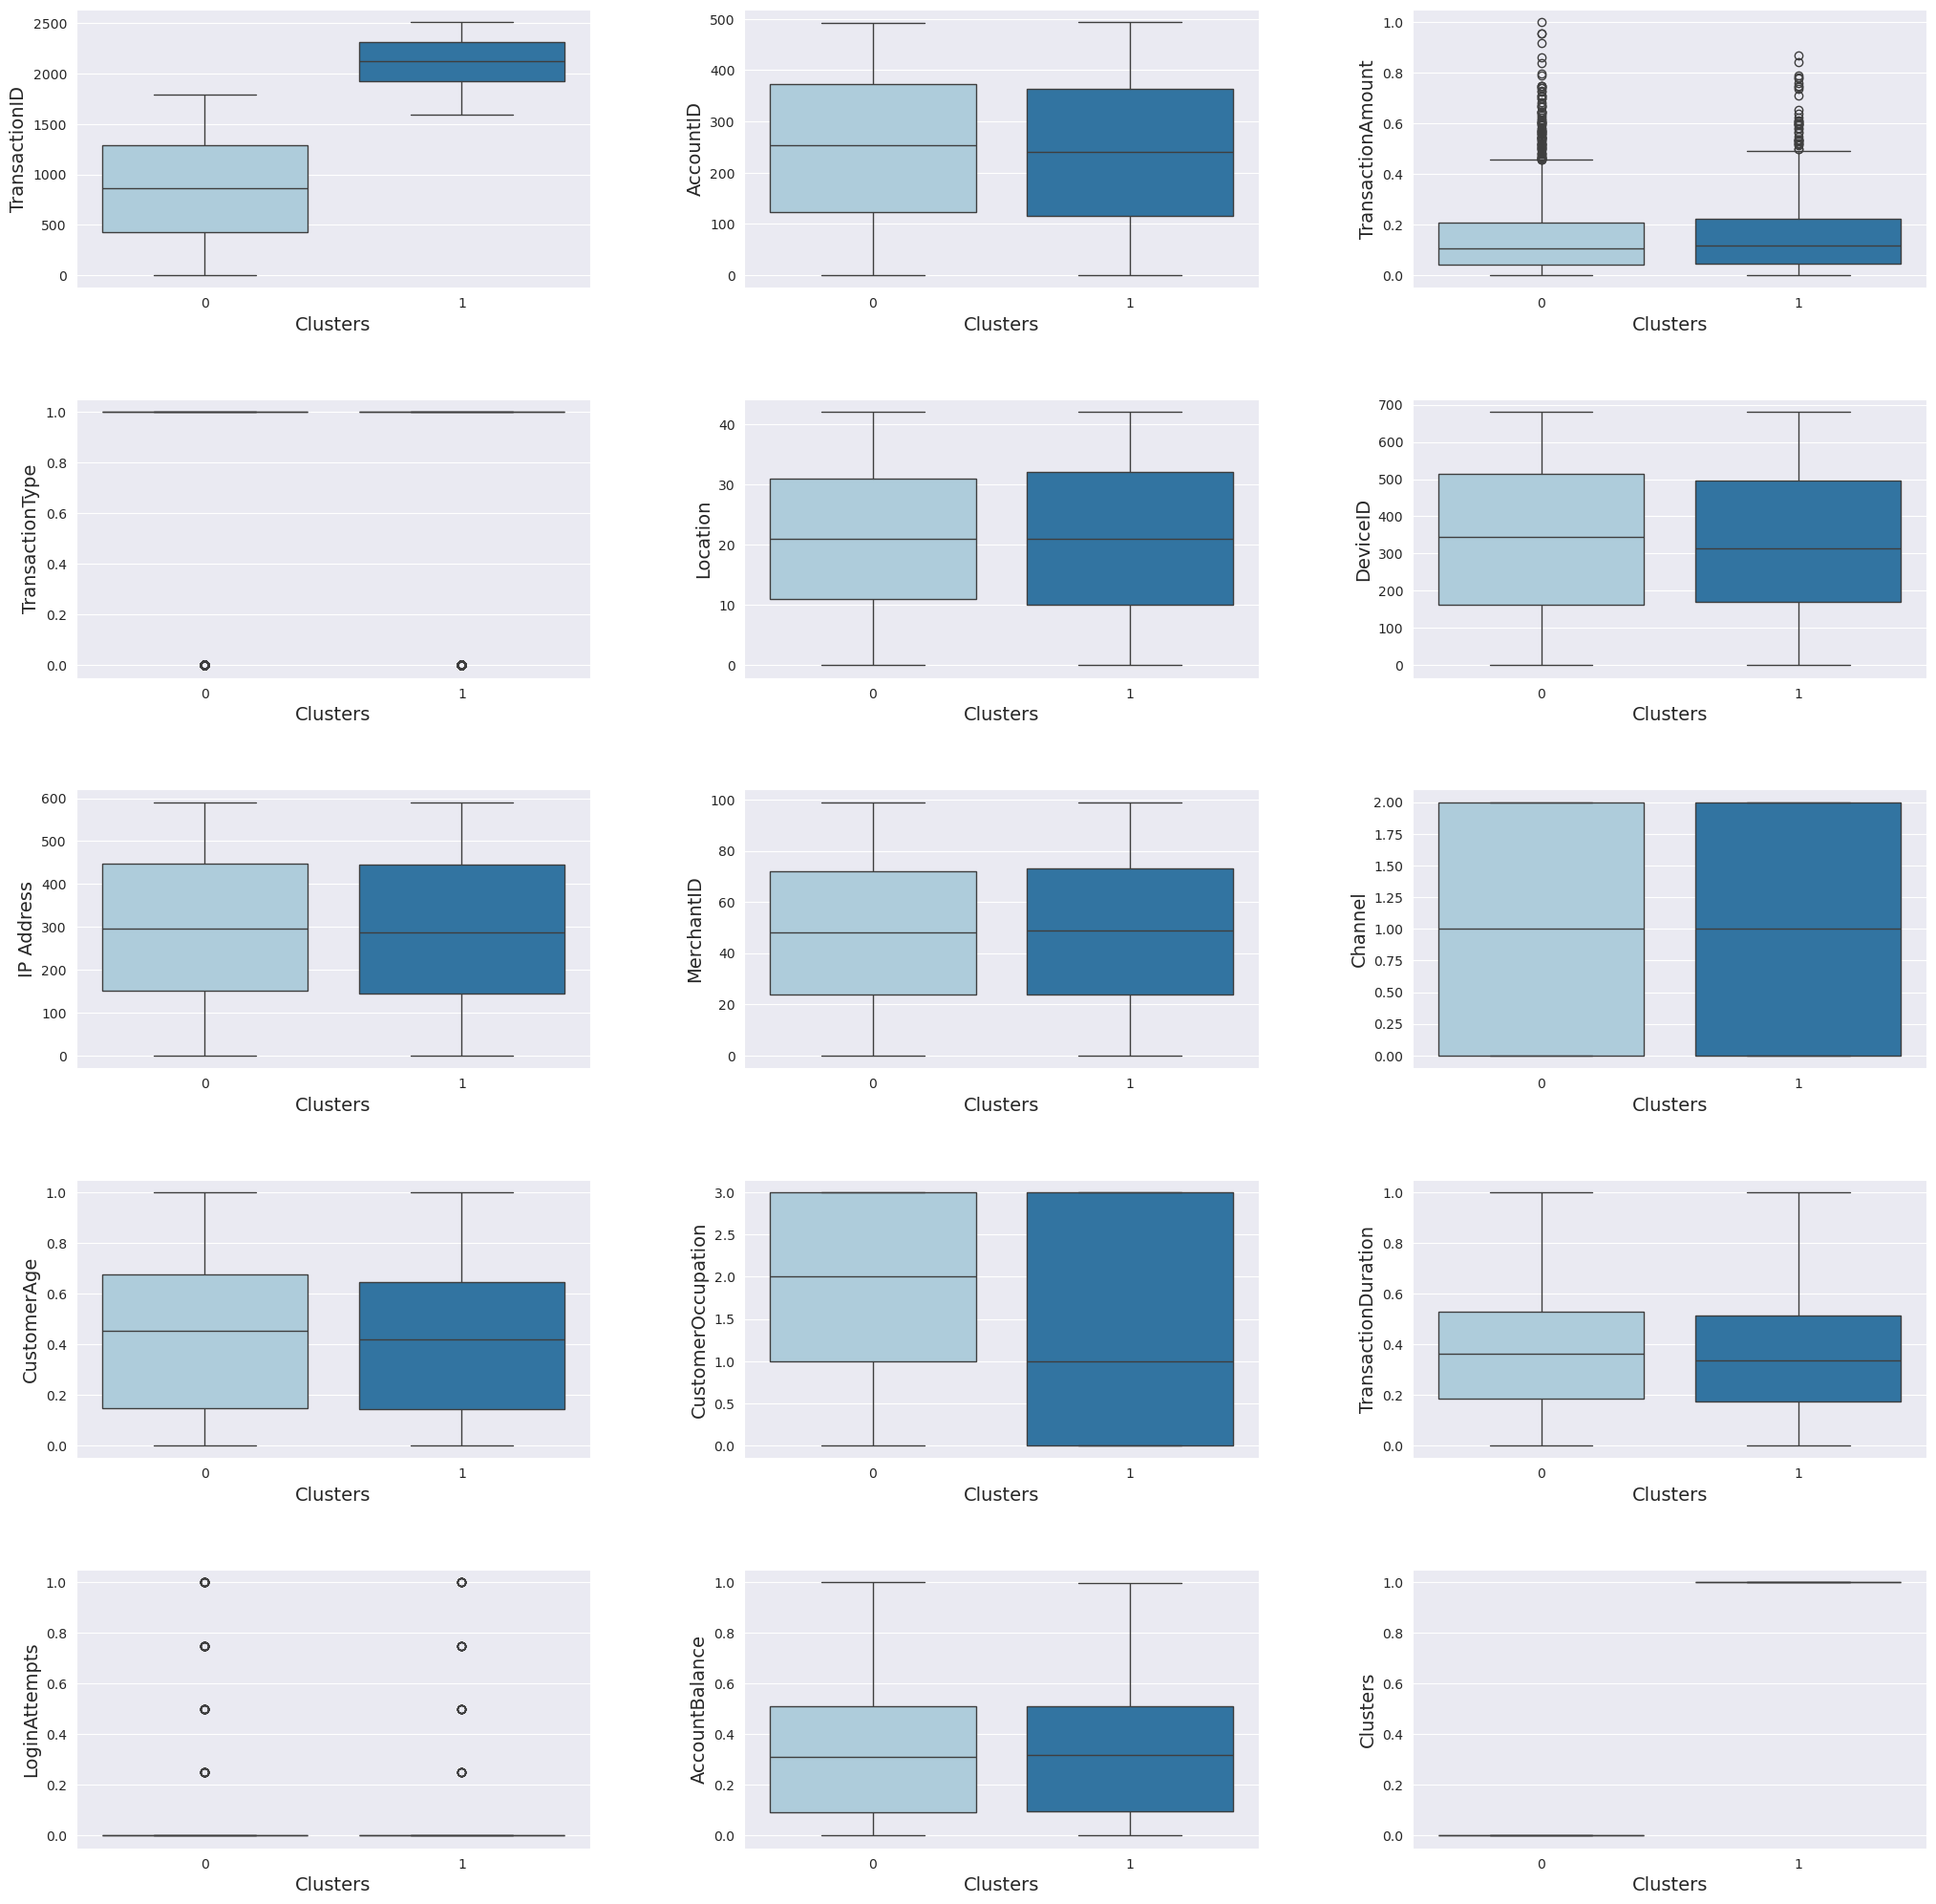

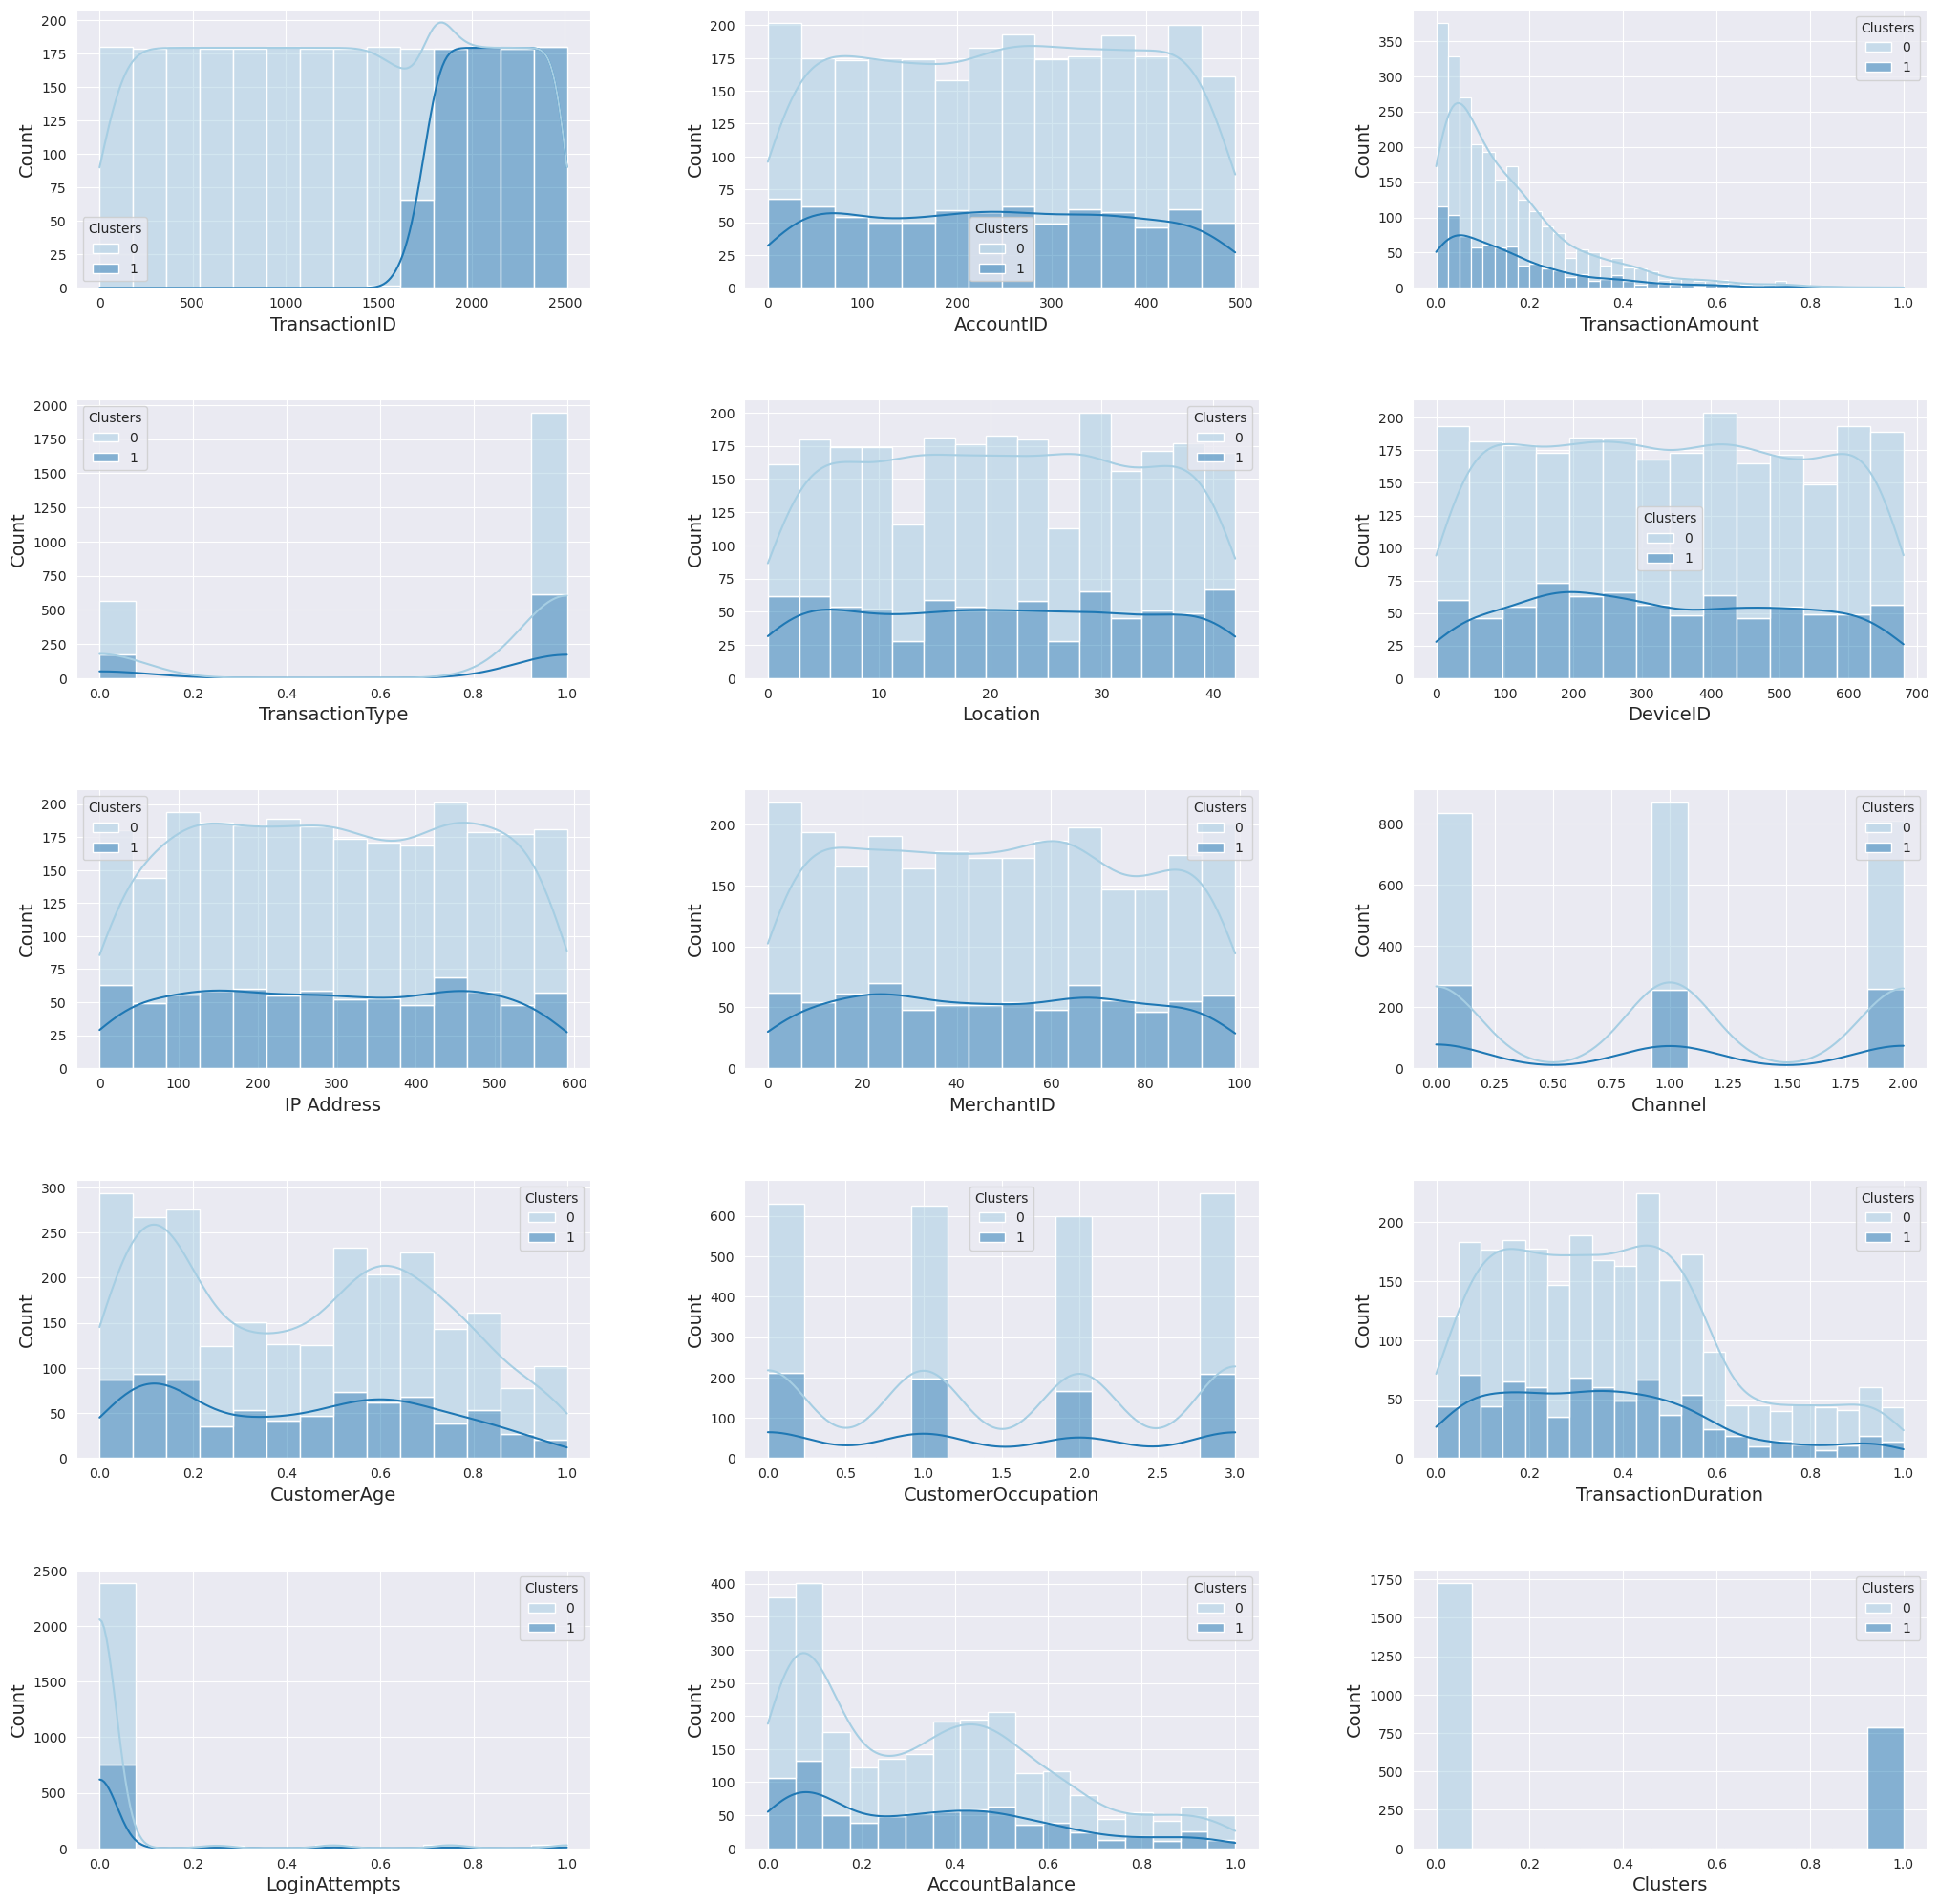

In [258]:
def graph_builder():
    """Graphs of the main characteristics for features int | float for the best models.
    The best model was chosen based on the results of the graphs"""
    def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df,
                 y=col,
                 x="Clusters",
                 palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Clusters', fontsize=14)
            b.set_ylabel(f'{df[col].name}', fontsize=14)
            sns.set_style('darkgrid')
    
    def histplot():    
        n_cols = len(num_cols)
        rows = n_cols // 3
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            h = sns.histplot(
                 data=df,
                 x=col,
                 hue="Clusters",
                 multiple="stack",
                 kde=True,
                 palette="Paired",
                 ax=axes.reshape(-1)[num])
                
            h.set_xlabel(f'{df[col].name}', fontsize=14)
            h.set_ylabel('Count', fontsize=14)
            sns.set_style('darkgrid')
            
    def barplot():
        n_cols = len(object_cols)
        rows = n_cols // 3 + n_cols % 3
        size_cluster = df.groupby("Clusters").count().iloc[:, 0]
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)    
        for num, col in enumerate(object_cols):
            data = (df.groupby(["Clusters"])[col].value_counts().unstack(fill_value=0).T)
            data = pd.DataFrame(data.unstack())
            data.columns = ["Number of objects"]
            data = data.reset_index()
            b= sns.barplot(
                 data=data,
                 x=data[col],
                 hue=data.Clusters,
                 y=data['Number of objects'],
                 ax=axes.reshape(-1)[num])
            b.set_xlabel(f'{data[col].name}', fontsize=14)
            b.set_ylabel('Number of objects', fontsize=14)
            sns.set_style('darkgrid')
    
    boxplot()
    histplot()
  
    
graph_builder()

In [259]:
df[df_col_select].dtypes

TransactionID            int64
AccountID                int64
TransactionAmount      float64
TransactionType          int64
Location                 int64
DeviceID                 int64
IP Address               int64
MerchantID               int64
Channel                  int64
CustomerAge            float64
CustomerOccupation       int64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
time_so_far            float64
dtype: object

In [260]:
df_show =  df[['AccountBalance', 'TransactionAmount']]


In [261]:
df_transform = df_transform.drop(columns=["Clusters_PCA"])

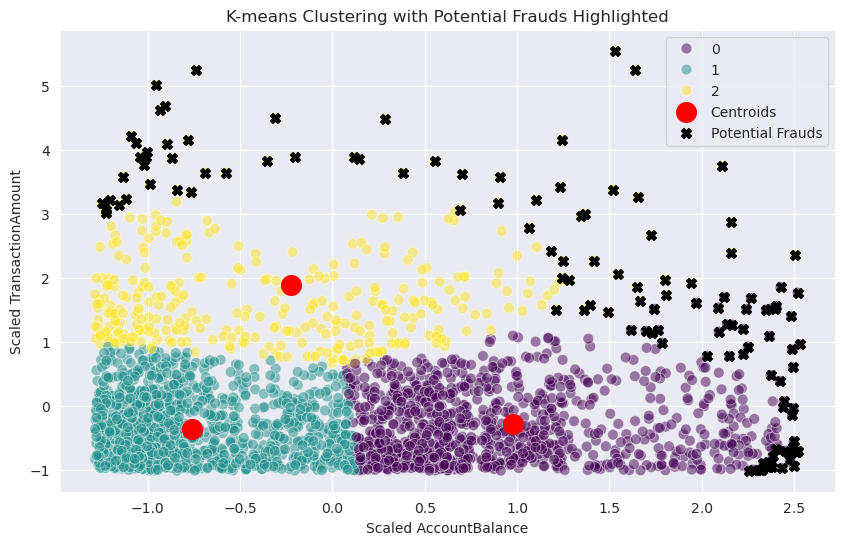

Number of potential frauds detected: 126


In [262]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_show)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df_transform['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df_transform['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df_transform[df_transform['Potential_Fraud']]
non_frauds = df_transform[~df_transform['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled AccountBalance')
plt.ylabel('Scaled TransactionAmount')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

/tmp/ipykernel_13064/3165397499.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['DBSCAN_Cluster'] = dbscan_labels
/tmp/ipykernel_13064/3165397499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['DBSCAN_Cluster'] = df_show['DBSCAN_Cluster'].map(label_mapping)


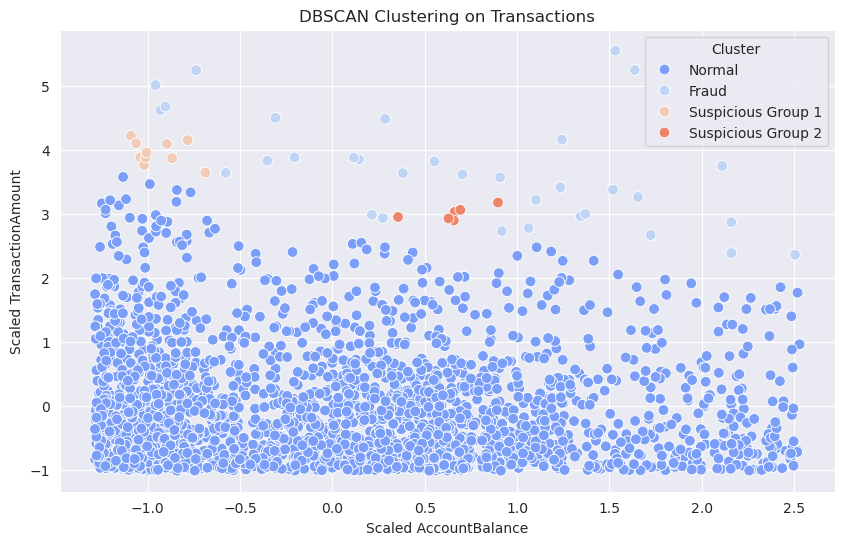

In [263]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
df_show['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
df_show['DBSCAN_Cluster'] = df_show['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_show['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled AccountBalance')
plt.ylabel('Scaled TransactionAmount')
plt.legend(title='Cluster')
plt.show()

/tmp/ipykernel_13064/1944726081.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Hierarchical_Cluster'] = hierarchical_labels
/tmp/ipykernel_13064/1944726081.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Hierarchical_Cluster'] = df_show['Hierarchical_Cluster'].map(cluster_mapping)


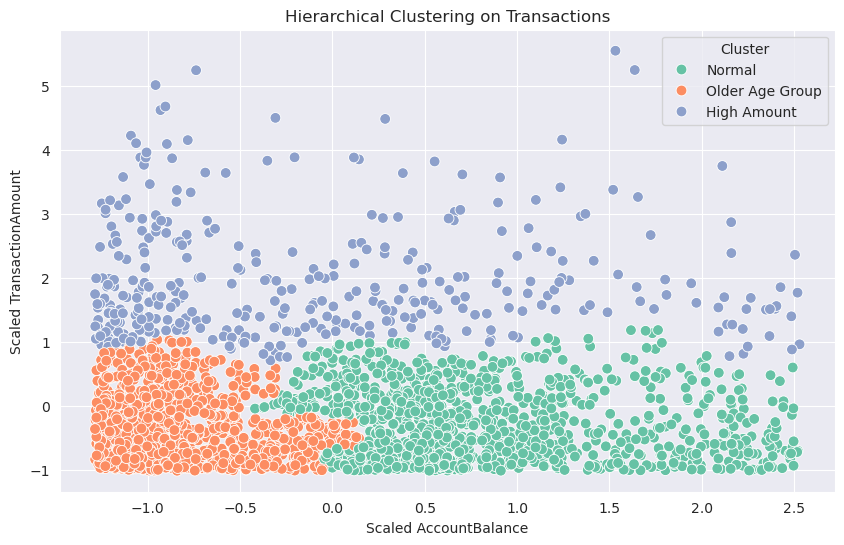

In [264]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
df_show['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
df_show['Hierarchical_Cluster'] = df_show['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_show['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled AccountBalance')
plt.ylabel('Scaled TransactionAmount')
plt.legend(title='Cluster')
plt.show()

/tmp/ipykernel_13064/3518616525.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)


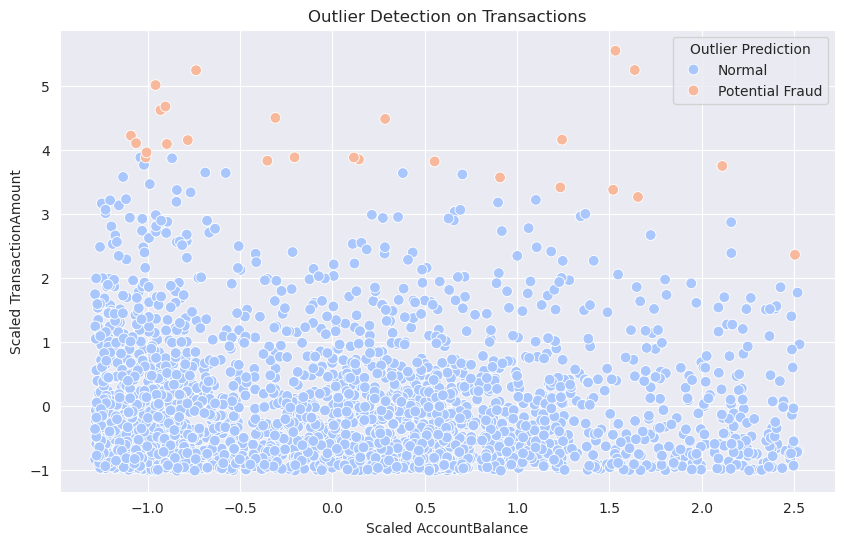

In [266]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
df_show['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_show['Outlier_Prediction'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled AccountBalance')
plt.ylabel('Scaled TransactionAmount')
plt.legend(title='Outlier Prediction')
plt.show()

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">END</div>